In [246]:
import nltk
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-white")

In [31]:
lines = []
with open('sotu.txt') as f:
    for line in f:
        lines.append(line.strip())

lines = [line for line in lines if line != '\n' and line != '']
lines.append('')

stars = [i for i, x in enumerate(lines) if x == '***']
# last line of file
stars.append(len(lines) - 1)

def president(i):
    return ' '.join(lines[stars[i] + 2 : stars[i] + 3]).strip()

def date(i):
    return ' '.join(lines[stars[i] + 3 : stars[i] + 4]).strip()

def speech(i):
    return ' '.join(lines[stars[i] + 4 : stars[i + 1]]).strip()

In [126]:
def tokenize_speech(speech):
    return nltk.tokenize.sent_tokenize(speech)

def sotu_sentences():
    sentences = []
    for i in range(len(stars) - 1):
        temp_sentences = [x.split(',') for x in tokenize_speech(speech(i))]
        sentences = sentences + [nltk.word_tokenize(x[0]) for x in temp_sentences]
    return sentences

In [127]:
sentences = sotu_sentences()

In [128]:
len(sentences)

60068

In [8]:
import gensim

In [165]:
# train the basic model with text8-rest, which is all the sentences
# without the word - queen
bigram_transformer = gensim.models.Phrases(sentences)
model = gensim.models.Word2Vec(bigram_transformer[sentences], size=100)
#model = gensim.models.Word2Vec()
#model.build_vocab(sentences)
model.train(sentences)

3128183

In [166]:
# Evaluation
model.most_similar('America')

[('world', 0.8196092844009399),
 ('freedom', 0.7895143032073975),
 ('Nation', 0.7117793560028076),
 ('society', 0.7083470821380615),
 ('democracy', 0.6956453919410706),
 ('mankind', 0.6912990808486938),
 ('community', 0.6883925795555115),
 ('nation', 0.687583863735199),
 ('us', 0.6674727201461792),
 ('future', 0.6513488292694092)]

In [185]:
model.most_similar(positive=['Churchill'], negative=['England'])

[('renew', 0.5379056930541992),
 ('inform', 0.5197756290435791),
 ('predecessor', 0.519643247127533),
 ('lay_before', 0.5108634829521179),
 ('announce', 0.5064438581466675),
 ('earnestly', 0.4998680353164673),
 ('thought', 0.4952680468559265),
 ('pleasure', 0.4904940128326416),
 ('communicate', 0.47466787695884705),
 ('transmit', 0.4725029170513153)]

In [206]:
model.most_similar(['terrorism', 'America'], ['freedom'])

[('terrorist', 0.831338107585907),
 ('prevalence', 0.8265184164047241),
 ('inherited', 0.8254297971725464),
 ('have_arisen', 0.8201935291290283),
 ('stretches', 0.8175661563873291),
 ('al_Qaeda', 0.8170592784881592),
 ('Negotiations_are', 0.8164798617362976),
 ('modern_industrial', 0.8079987168312073),
 ('free_trade', 0.8074973821640015),
 ('alarm', 0.8059863448143005)]

In [235]:
vec = model['Communism'] + model['Asia']
model.most_similar(positive=[vec], topn=4)

[('Asia', 0.9890565872192383),
 ('East', 0.8929318189620972),
 ('Americas', 0.8904061317443848),
 ('Europe', 0.8596049547195435)]

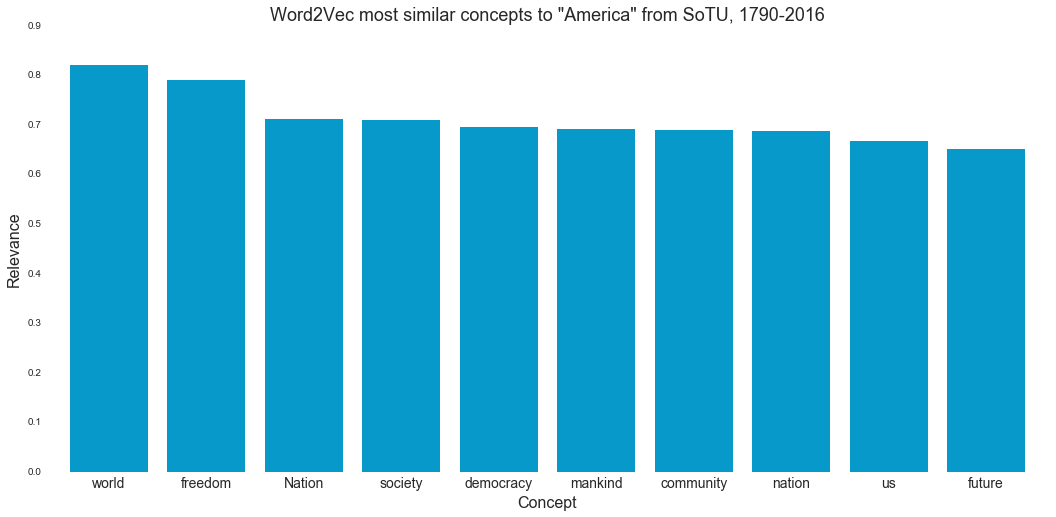

In [260]:
cool_blue = '#0699C9'
hot_red = '#DE182F'

plt.style.use('seaborn-white')

#sort by date and plot
ax = pd.DataFrame(model.most_similar('America', topn=10)).plot(kind='bar', width=.8, x=0, color=cool_blue,
                rot=0, legend=False, figsize=(18, 8), edgecolor="none")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Word2Vec most similar concepts to \"America\" from SoTU, 1790-2016", fontsize="18")
plt.ylabel("Relevance", fontsize=16)
plt.xticks(fontsize="14")
plt.xlabel("Concept", fontsize=16)